In [1]:
#%load_ext autoreload
#%autoreload 2

import os
import random

import utils
import DCGAN
#from SubsetMNIST import SubsetMNIST
from Networks import SimpleNet
from active_learners import *
from losses import * 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.nn import functional as F

manual_seed = 1338
random.seed(manual_seed)
torch.manual_seed(manual_seed)
print(torch.__version__)

0.4.1


# Plot results

In [7]:
def x_range(arr, initial_label_pool_size):
    return range(initial_label_pool_size, initial_label_pool_size+len(arr))
def plot_it (means,stds,name,initial_label_pool_size): 
    return plt.errorbar(x_range(means,initial_label_pool_size),means,yerr=stds,label=name)

In [ ]:
fps = ['rand_learner',
       'entr_learner',
       'entr_dens_learner',
       'div_learner',
       'dens_div_learner',
       'entr_dens_div_learner']

-------- instances from 4/4 clusters initially labeled --------
rand_learner 
 	 max acc: 0.9295 @ it:12 | end acc: 0.9285
entr_learner 
 	 max acc: 0.9335 @ it:8 | end acc: 0.9170
entr_dens_learner 
 	 max acc: 0.9295 @ it:12 | end acc: 0.9185
div_learner 
 	 max acc: 0.9355 @ it:11 | end acc: 0.9330
dens_div_learner 
 	 max acc: 0.9340 @ it:5 | end acc: 0.9300
entr_dens_div_learner 
 	 max acc: 0.9395 @ it:13 | end acc: 0.9395


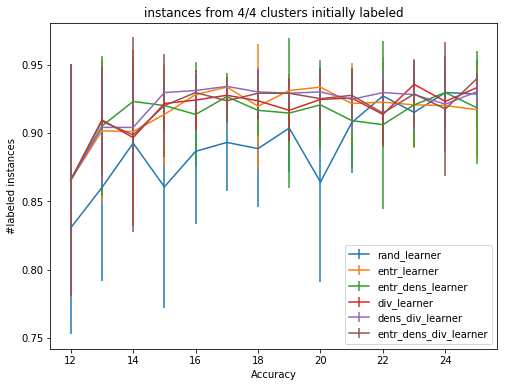

-------- instances from 3/4 clusters initially labeled --------
rand_learner 
 	 max acc: 0.9350 @ it:16 | end acc: 0.9350
entr_learner 
 	 max acc: 0.7740 @ it:16 | end acc: 0.7740
entr_dens_learner 
 	 max acc: 0.9310 @ it:15 | end acc: 0.9165
div_learner 
 	 max acc: 0.9325 @ it:15 | end acc: 0.9235
dens_div_learner 
 	 max acc: 0.9380 @ it:13 | end acc: 0.9175
entr_dens_div_learner 
 	 max acc: 0.9360 @ it:10 | end acc: 0.9285


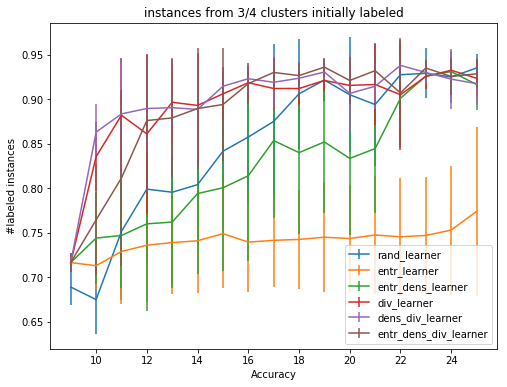

-------- instances from 2/4 clusters initially labeled --------
rand_learner 
 	 max acc: 0.8895 @ it:19 | end acc: 0.8895
entr_learner 
 	 max acc: 0.7455 @ it:12 | end acc: 0.7450
entr_dens_learner 
 	 max acc: 0.9265 @ it:19 | end acc: 0.9265
div_learner 
 	 max acc: 0.9345 @ it:17 | end acc: 0.9345
dens_div_learner 
 	 max acc: 0.9375 @ it:16 | end acc: 0.9310
entr_dens_div_learner 
 	 max acc: 0.9375 @ it:19 | end acc: 0.9375


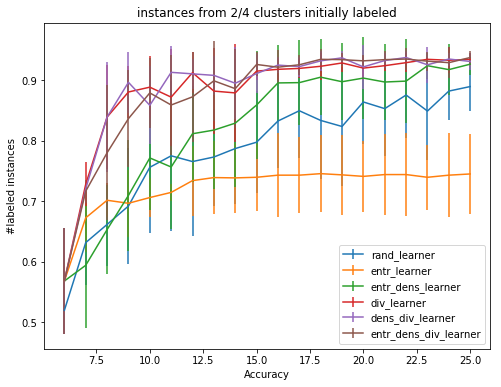

-------- instances from 1/4 clusters initially labeled --------
rand_learner 
 	 max acc: 0.9020 @ it:22 | end acc: 0.9020
entr_learner 
 	 max acc: 0.7845 @ it:22 | end acc: 0.7845
entr_dens_learner 
 	 max acc: 0.9155 @ it:22 | end acc: 0.9155
div_learner 
 	 max acc: 0.9395 @ it:19 | end acc: 0.9325
dens_div_learner 
 	 max acc: 0.9370 @ it:16 | end acc: 0.9265
entr_dens_div_learner 
 	 max acc: 0.9365 @ it:16 | end acc: 0.9275


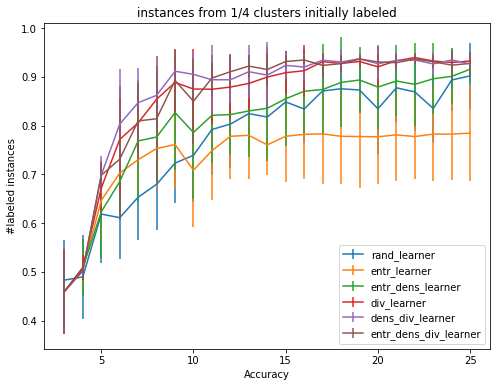

-------- instances from 0/4 clusters initially labeled --------
rand_learner 
 	 max acc: 0.9395 @ it:24 | end acc: 0.9395
entr_learner 
 	 max acc: 0.8195 @ it:23 | end acc: 0.8095
entr_dens_learner 
 	 max acc: 0.9250 @ it:17 | end acc: 0.9170
div_learner 
 	 max acc: 0.9355 @ it:24 | end acc: 0.9355
dens_div_learner 
 	 max acc: 0.9290 @ it:14 | end acc: 0.9275
entr_dens_div_learner 
 	 max acc: 0.9365 @ it:20 | end acc: 0.9340


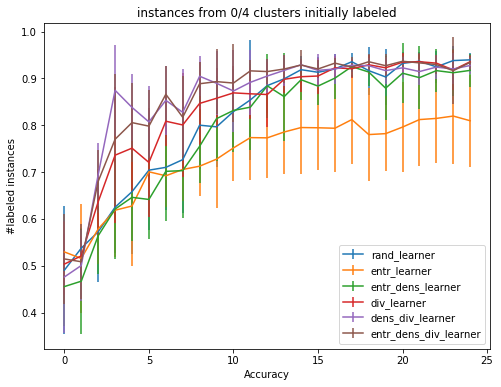

In [20]:
#baseline plots
#supervised_plt = plt.errorbar(x_range(rand_mean),[supervised_mean]*len(rand_mean),label='fully supervised')#yerr=[supervised_std]*226,

result_folder = './experiment_results/synthetic_experiments/temp0.1/'
for i in [4,3,2,1,0]:
    plt.figure(figsize=(8,6))
    print('-'*8,'instances from {}/4 clusters initially labeled'.format(i),'-'*8)

    initial_label_pool_size = 3*i
    for fp in fps:    
        _,_,_,mean,std = utils.load_obj(result_folder+fp+str(i))
        plot_it(mean,std,fp,initial_label_pool_size)
        print('{} \n \t max acc: {:.4f} @ it:{} | end acc: {:.4f}'.format(fp, 
                                                                     mean.max().item(),
                                                                     mean.argmax().item(),
                                                                     mean[-1].item()))

    plt.xlabel('Accuracy')
    plt.ylabel('#labeled instances')
    plt.title('instances from {}/4 clusters initially labeled'.format(i))
    plt.legend(loc='lower right')
    plt.show()

-------- instances from 4/4 clusters initially labeled --------
entr_learner @ temp 0.0 
 	 max acc: 0.9375 @ it:12 | end acc: 0.9115
entr_learner @ temp 0.1 
 	 max acc: 0.9320 @ it:6 | end acc: 0.9240
entr_learner @ temp 0.5 
 	 max acc: 0.9255 @ it:12 | end acc: 0.9075
entr_learner @ temp 1.0 
 	 max acc: 0.9255 @ it:9 | end acc: 0.8995


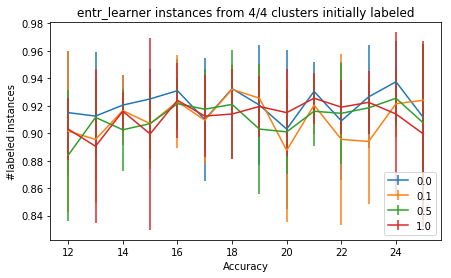

entr_dens_learner @ temp 0.0 
 	 max acc: 0.9585 @ it:9 | end acc: 0.9375
entr_dens_learner @ temp 0.1 
 	 max acc: 0.9285 @ it:9 | end acc: 0.9200
entr_dens_learner @ temp 0.5 
 	 max acc: 0.9060 @ it:13 | end acc: 0.9060
entr_dens_learner @ temp 1.0 
 	 max acc: 0.9310 @ it:4 | end acc: 0.9130


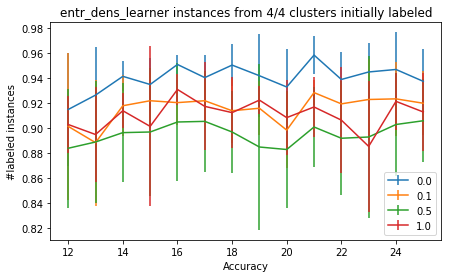

div_learner @ temp 0.0 
 	 max acc: 0.9510 @ it:6 | end acc: 0.9345
div_learner @ temp 0.1 
 	 max acc: 0.9275 @ it:12 | end acc: 0.9135
div_learner @ temp 0.5 
 	 max acc: 0.9185 @ it:10 | end acc: 0.9085
div_learner @ temp 1.0 
 	 max acc: 0.9160 @ it:9 | end acc: 0.8965


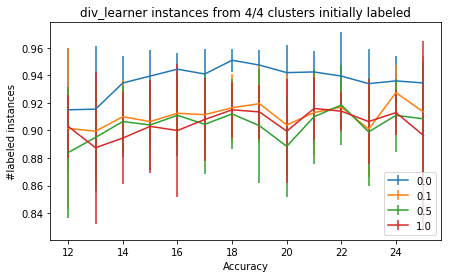

dens_div_learner @ temp 0.0 
 	 max acc: 0.9450 @ it:6 | end acc: 0.9370
dens_div_learner @ temp 0.1 
 	 max acc: 0.9245 @ it:9 | end acc: 0.9130
dens_div_learner @ temp 0.5 
 	 max acc: 0.9270 @ it:10 | end acc: 0.9205
dens_div_learner @ temp 1.0 
 	 max acc: 0.9265 @ it:6 | end acc: 0.9255


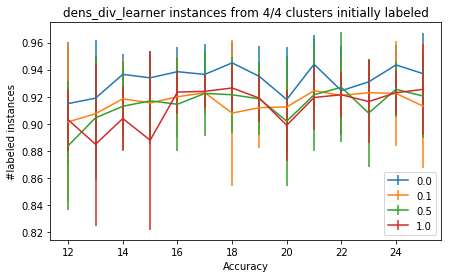

entr_dens_div_learner @ temp 0.0 
 	 max acc: 0.9490 @ it:12 | end acc: 0.9370
entr_dens_div_learner @ temp 0.1 
 	 max acc: 0.9340 @ it:4 | end acc: 0.9125
entr_dens_div_learner @ temp 0.5 
 	 max acc: 0.9245 @ it:6 | end acc: 0.9115
entr_dens_div_learner @ temp 1.0 
 	 max acc: 0.9285 @ it:6 | end acc: 0.9145


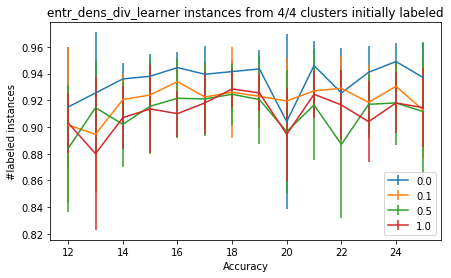

-------- instances from 3/4 clusters initially labeled --------
entr_learner @ temp 0.0 
 	 max acc: 0.7525 @ it:15 | end acc: 0.7475
entr_learner @ temp 0.1 
 	 max acc: 0.7515 @ it:8 | end acc: 0.7390
entr_learner @ temp 0.5 
 	 max acc: 0.7855 @ it:7 | end acc: 0.7810
entr_learner @ temp 1.0 
 	 max acc: 0.8350 @ it:15 | end acc: 0.8200


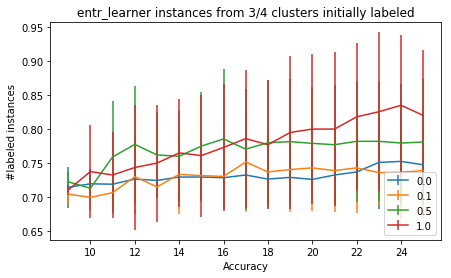

entr_dens_learner @ temp 0.0 
 	 max acc: 0.9385 @ it:13 | end acc: 0.9195
entr_dens_learner @ temp 0.1 
 	 max acc: 0.8900 @ it:15 | end acc: 0.8840
entr_dens_learner @ temp 0.5 
 	 max acc: 0.9200 @ it:14 | end acc: 0.9200
entr_dens_learner @ temp 1.0 
 	 max acc: 0.9245 @ it:10 | end acc: 0.8850


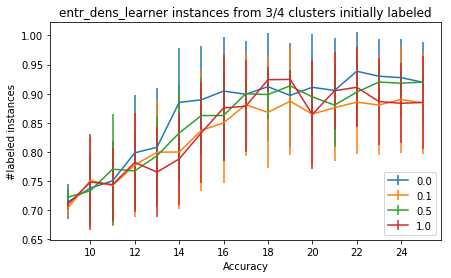

div_learner @ temp 0.0 
 	 max acc: 0.9490 @ it:12 | end acc: 0.9415
div_learner @ temp 0.1 
 	 max acc: 0.9355 @ it:13 | end acc: 0.9300
div_learner @ temp 0.5 
 	 max acc: 0.9250 @ it:15 | end acc: 0.9170
div_learner @ temp 1.0 
 	 max acc: 0.9340 @ it:14 | end acc: 0.9230


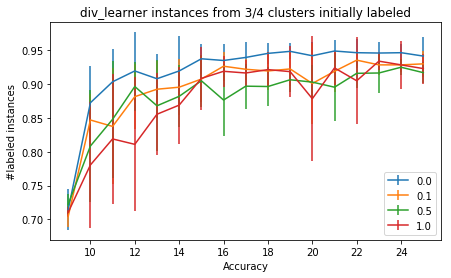

dens_div_learner @ temp 0.0 
 	 max acc: 0.9570 @ it:13 | end acc: 0.9510
dens_div_learner @ temp 0.1 
 	 max acc: 0.9360 @ it:16 | end acc: 0.9360
dens_div_learner @ temp 0.5 
 	 max acc: 0.9330 @ it:13 | end acc: 0.9245
dens_div_learner @ temp 1.0 
 	 max acc: 0.9410 @ it:15 | end acc: 0.9290


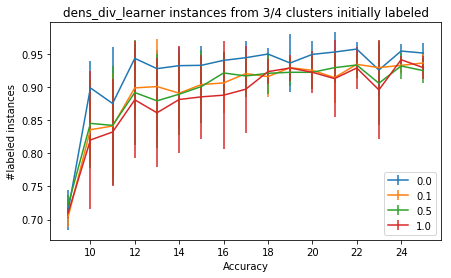

entr_dens_div_learner @ temp 0.0 
 	 max acc: 0.9575 @ it:13 | end acc: 0.9445
entr_dens_div_learner @ temp 0.1 
 	 max acc: 0.9315 @ it:10 | end acc: 0.9255
entr_dens_div_learner @ temp 0.5 
 	 max acc: 0.9305 @ it:10 | end acc: 0.9160
entr_dens_div_learner @ temp 1.0 
 	 max acc: 0.9365 @ it:15 | end acc: 0.9255


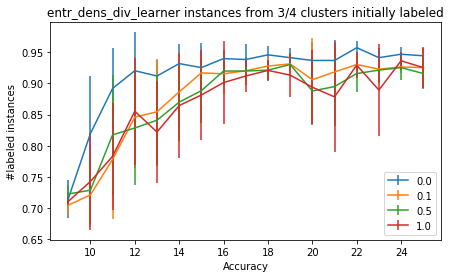

-------- instances from 2/4 clusters initially labeled --------
entr_learner @ temp 0.0 
 	 max acc: 0.7305 @ it:13 | end acc: 0.7270
entr_learner @ temp 0.1 
 	 max acc: 0.7640 @ it:19 | end acc: 0.7640
entr_learner @ temp 0.5 
 	 max acc: 0.8635 @ it:19 | end acc: 0.8635
entr_learner @ temp 1.0 
 	 max acc: 0.8965 @ it:19 | end acc: 0.8965


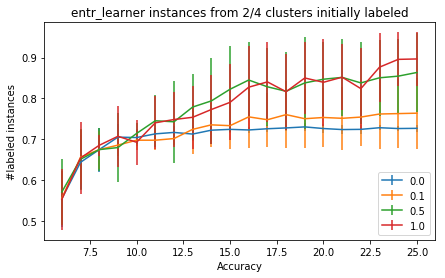

entr_dens_learner @ temp 0.0 
 	 max acc: 0.8700 @ it:14 | end acc: 0.8600
entr_dens_learner @ temp 0.1 
 	 max acc: 0.8930 @ it:18 | end acc: 0.8760
entr_dens_learner @ temp 0.5 
 	 max acc: 0.8890 @ it:12 | end acc: 0.8615
entr_dens_learner @ temp 1.0 
 	 max acc: 0.9095 @ it:19 | end acc: 0.9095


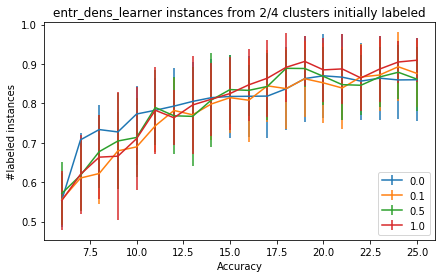

div_learner @ temp 0.0 
 	 max acc: 0.9485 @ it:18 | end acc: 0.9445
div_learner @ temp 0.1 
 	 max acc: 0.9345 @ it:18 | end acc: 0.9310
div_learner @ temp 0.5 
 	 max acc: 0.9320 @ it:16 | end acc: 0.9305
div_learner @ temp 1.0 
 	 max acc: 0.9280 @ it:15 | end acc: 0.9190


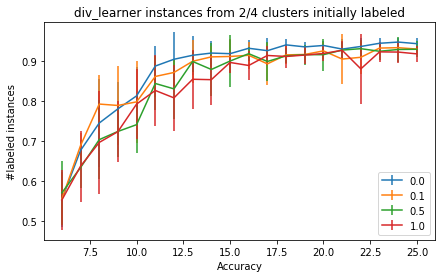

dens_div_learner @ temp 0.0 
 	 max acc: 0.9515 @ it:17 | end acc: 0.9425
dens_div_learner @ temp 0.1 
 	 max acc: 0.9320 @ it:17 | end acc: 0.9260
dens_div_learner @ temp 0.5 
 	 max acc: 0.9330 @ it:14 | end acc: 0.9280
dens_div_learner @ temp 1.0 
 	 max acc: 0.9355 @ it:18 | end acc: 0.9330


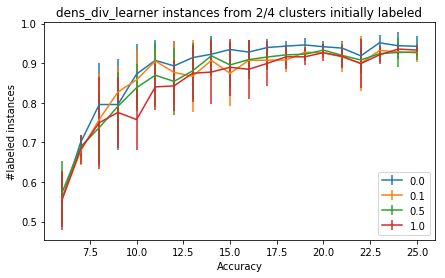

entr_dens_div_learner @ temp 0.0 
 	 max acc: 0.9525 @ it:17 | end acc: 0.9425
entr_dens_div_learner @ temp 0.1 
 	 max acc: 0.9360 @ it:19 | end acc: 0.9360
entr_dens_div_learner @ temp 0.5 
 	 max acc: 0.9180 @ it:17 | end acc: 0.8965
entr_dens_div_learner @ temp 1.0 
 	 max acc: 0.9325 @ it:17 | end acc: 0.9325


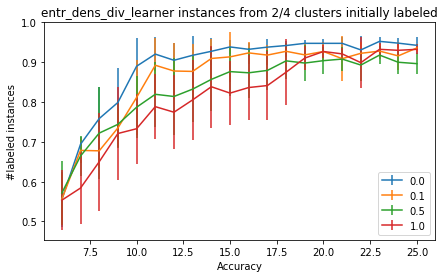

-------- instances from 1/4 clusters initially labeled --------
entr_learner @ temp 0.0 
 	 max acc: 0.7945 @ it:21 | end acc: 0.7910
entr_learner @ temp 0.1 
 	 max acc: 0.8055 @ it:22 | end acc: 0.8055
entr_learner @ temp 0.5 
 	 max acc: 0.8715 @ it:22 | end acc: 0.8715
entr_learner @ temp 1.0 
 	 max acc: 0.9050 @ it:21 | end acc: 0.9040


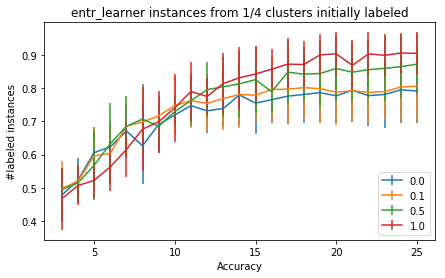

entr_dens_learner @ temp 0.0 
 	 max acc: 0.9120 @ it:21 | end acc: 0.9105
entr_dens_learner @ temp 0.1 
 	 max acc: 0.8815 @ it:21 | end acc: 0.8810
entr_dens_learner @ temp 0.5 
 	 max acc: 0.9150 @ it:22 | end acc: 0.9150
entr_dens_learner @ temp 1.0 
 	 max acc: 0.9140 @ it:22 | end acc: 0.9140


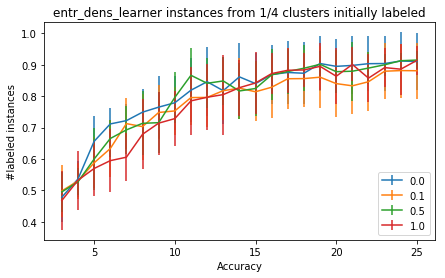

div_learner @ temp 0.0 
 	 max acc: 0.9460 @ it:22 | end acc: 0.9460
div_learner @ temp 0.1 
 	 max acc: 0.9330 @ it:19 | end acc: 0.9300
div_learner @ temp 0.5 
 	 max acc: 0.9255 @ it:21 | end acc: 0.9155
div_learner @ temp 1.0 
 	 max acc: 0.9360 @ it:22 | end acc: 0.9360


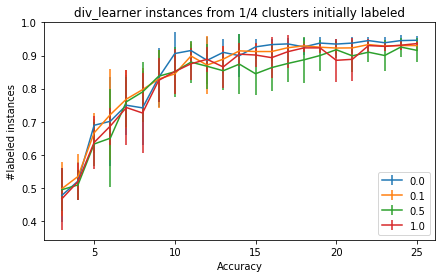

dens_div_learner @ temp 0.0 
 	 max acc: 0.9535 @ it:22 | end acc: 0.9535
dens_div_learner @ temp 0.1 
 	 max acc: 0.9420 @ it:16 | end acc: 0.9400
dens_div_learner @ temp 0.5 
 	 max acc: 0.9270 @ it:21 | end acc: 0.9220
dens_div_learner @ temp 1.0 
 	 max acc: 0.9335 @ it:22 | end acc: 0.9335


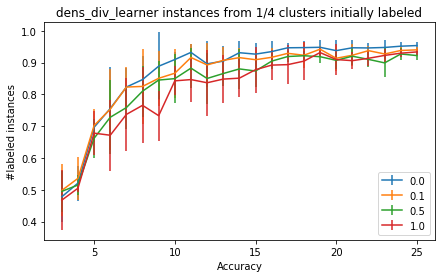

entr_dens_div_learner @ temp 0.0 
 	 max acc: 0.9490 @ it:22 | end acc: 0.9490
entr_dens_div_learner @ temp 0.1 
 	 max acc: 0.9405 @ it:22 | end acc: 0.9405
entr_dens_div_learner @ temp 0.5 
 	 max acc: 0.9210 @ it:22 | end acc: 0.9210
entr_dens_div_learner @ temp 1.0 
 	 max acc: 0.9245 @ it:21 | end acc: 0.9235


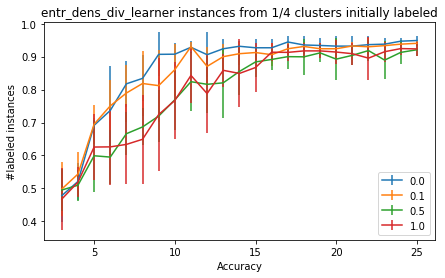

-------- instances from 0/4 clusters initially labeled --------
entr_learner @ temp 0.0 
 	 max acc: 0.7660 @ it:21 | end acc: 0.7445
entr_learner @ temp 0.1 
 	 max acc: 0.8265 @ it:24 | end acc: 0.8265
entr_learner @ temp 0.5 
 	 max acc: 0.8725 @ it:23 | end acc: 0.8630
entr_learner @ temp 1.0 
 	 max acc: 0.9125 @ it:24 | end acc: 0.9125


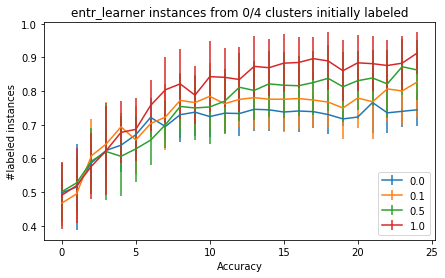

entr_dens_learner @ temp 0.0 
 	 max acc: 0.9480 @ it:23 | end acc: 0.9450
entr_dens_learner @ temp 0.1 
 	 max acc: 0.9110 @ it:18 | end acc: 0.9105
entr_dens_learner @ temp 0.5 
 	 max acc: 0.9275 @ it:24 | end acc: 0.9275
entr_dens_learner @ temp 1.0 
 	 max acc: 0.9260 @ it:24 | end acc: 0.9260


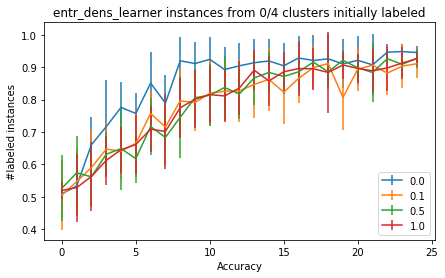

div_learner @ temp 0.0 
 	 max acc: 0.9550 @ it:24 | end acc: 0.9550
div_learner @ temp 0.1 
 	 max acc: 0.9295 @ it:24 | end acc: 0.9295
div_learner @ temp 0.5 
 	 max acc: 0.9340 @ it:22 | end acc: 0.9275
div_learner @ temp 1.0 
 	 max acc: 0.9315 @ it:24 | end acc: 0.9315


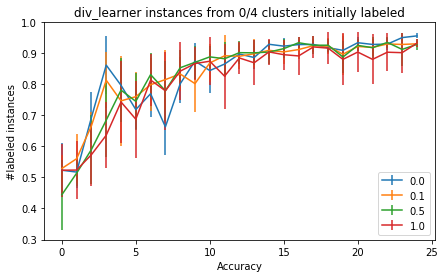

dens_div_learner @ temp 0.0 
 	 max acc: 0.9515 @ it:16 | end acc: 0.9425
dens_div_learner @ temp 0.1 
 	 max acc: 0.9425 @ it:22 | end acc: 0.9275
dens_div_learner @ temp 0.5 
 	 max acc: 0.9385 @ it:24 | end acc: 0.9385
dens_div_learner @ temp 1.0 
 	 max acc: 0.9340 @ it:23 | end acc: 0.9260


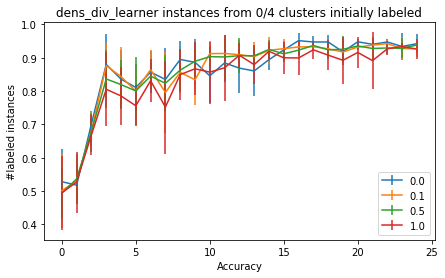

entr_dens_div_learner @ temp 0.0 
 	 max acc: 0.9545 @ it:24 | end acc: 0.9545
entr_dens_div_learner @ temp 0.1 
 	 max acc: 0.9335 @ it:14 | end acc: 0.9220
entr_dens_div_learner @ temp 0.5 
 	 max acc: 0.9225 @ it:23 | end acc: 0.9170
entr_dens_div_learner @ temp 1.0 
 	 max acc: 0.9295 @ it:22 | end acc: 0.9255


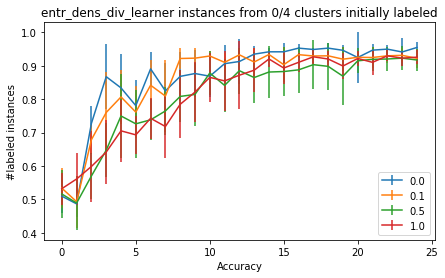

In [21]:
result_folder = './experiment_results/synthetic_experiments2/temp'
for i in [4,3,2,1,0]:
    
    print('-'*8,'instances from {}/4 clusters initially labeled'.format(i),'-'*8)

    initial_label_pool_size = 3*i
    for fp in fps[1:]: #everything but rand learner
        plt.figure(figsize=(7,4))
        for temp in [0.,0.1,0.5,1.]:
            _,_,_,mean,std = utils.load_obj(result_folder+str(temp)+'/'+fp+str(i))
            plot_it(mean,std,temp,initial_label_pool_size)
            print('{} @ temp {} \n \t max acc: {:.4f} @ it:{} | end acc: {:.4f}'.format(fp, temp,
                                                                         mean.max().item(),
                                                                         mean.argmax().item(),
                                                                         mean[-1].item()))

        plt.xlabel('Accuracy')
        plt.ylabel('#labeled instances')
        plt.title('{} instances from {}/4 clusters initially labeled'.format(fp,i))
        plt.legend(loc='lower right')
        plt.show()